In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from  keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [20]:
np.random.seed(0)

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[1:] == (28,28)), "The dimension of images is not proper"
assert(X_test.shape[1:] == (28,28)), "The dimension of images is not proper"

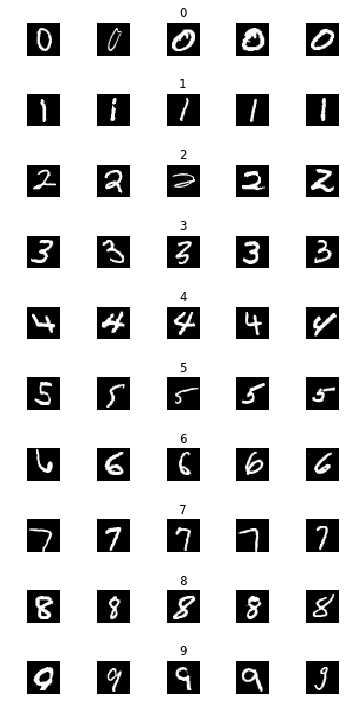

In [24]:
num_of_samples = []
cols =5
num_class = 10
fig, axs =plt.subplots(nrows=num_class, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_class):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), : ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of Images')

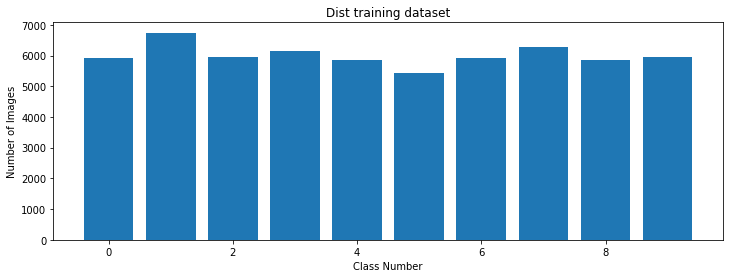

In [25]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_class),num_of_samples)
plt.title("Dist training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [26]:
y_train = to_categorical(y_train, 10)
y_test =to_categorical(y_test, 10)

In [27]:
X_train = X_train/ 255
X_test = X_test / 255

In [28]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)




In [29]:
def createmodel():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_class, activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [30]:
model = createmodel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 131us/step - loss: 0.5399 - acc: 0.8307 - val_loss: 0.2737 - val_acc: 0.9235
Epoch 2/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.3026 - acc: 0.9119 - val_loss: 0.2409 - val_acc: 0.9297
Epoch 3/10
54000/54000 [==============================] - 5s 99us/step - loss: 0.2766 - acc: 0.9195 - val_loss: 0.2290 - val_acc: 0.9337
Epoch 4/10
54000/54000 [==============================] - 6s 104us/step - loss: 0.2645 - acc: 0.9212 - val_loss: 0.2131 - val_acc: 0.9380
Epoch 5/10
54000/54000 [==============================] - 6s 106us/step - loss: 0.2513 - acc: 0.9262 - val_loss: 0.2211 - val_acc: 0.9372
Epoch 6/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.2498 - acc: 0.9270 - val_loss: 0.2120 - val_acc: 0.9413
Epoch 7/10
54000/54000 [==============================] - 6s 107us/step - loss: 0.2401 - acc: 0.9295 - val_loss: 0.2093 - va

Text(0.5,0,'epoch')

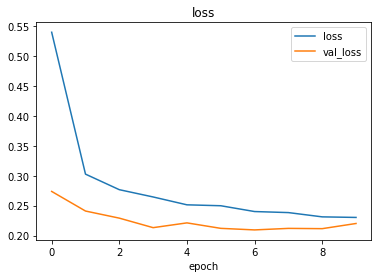

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

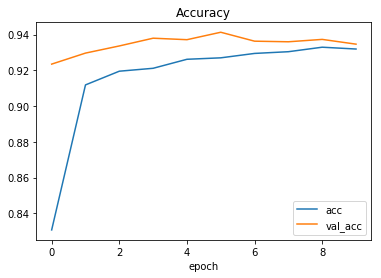

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score[0],score[1])

0.2733994314789772 0.9205
